In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams["figure.dpi"] = 300
np.set_printoptions(precision=3, suppress=True)
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

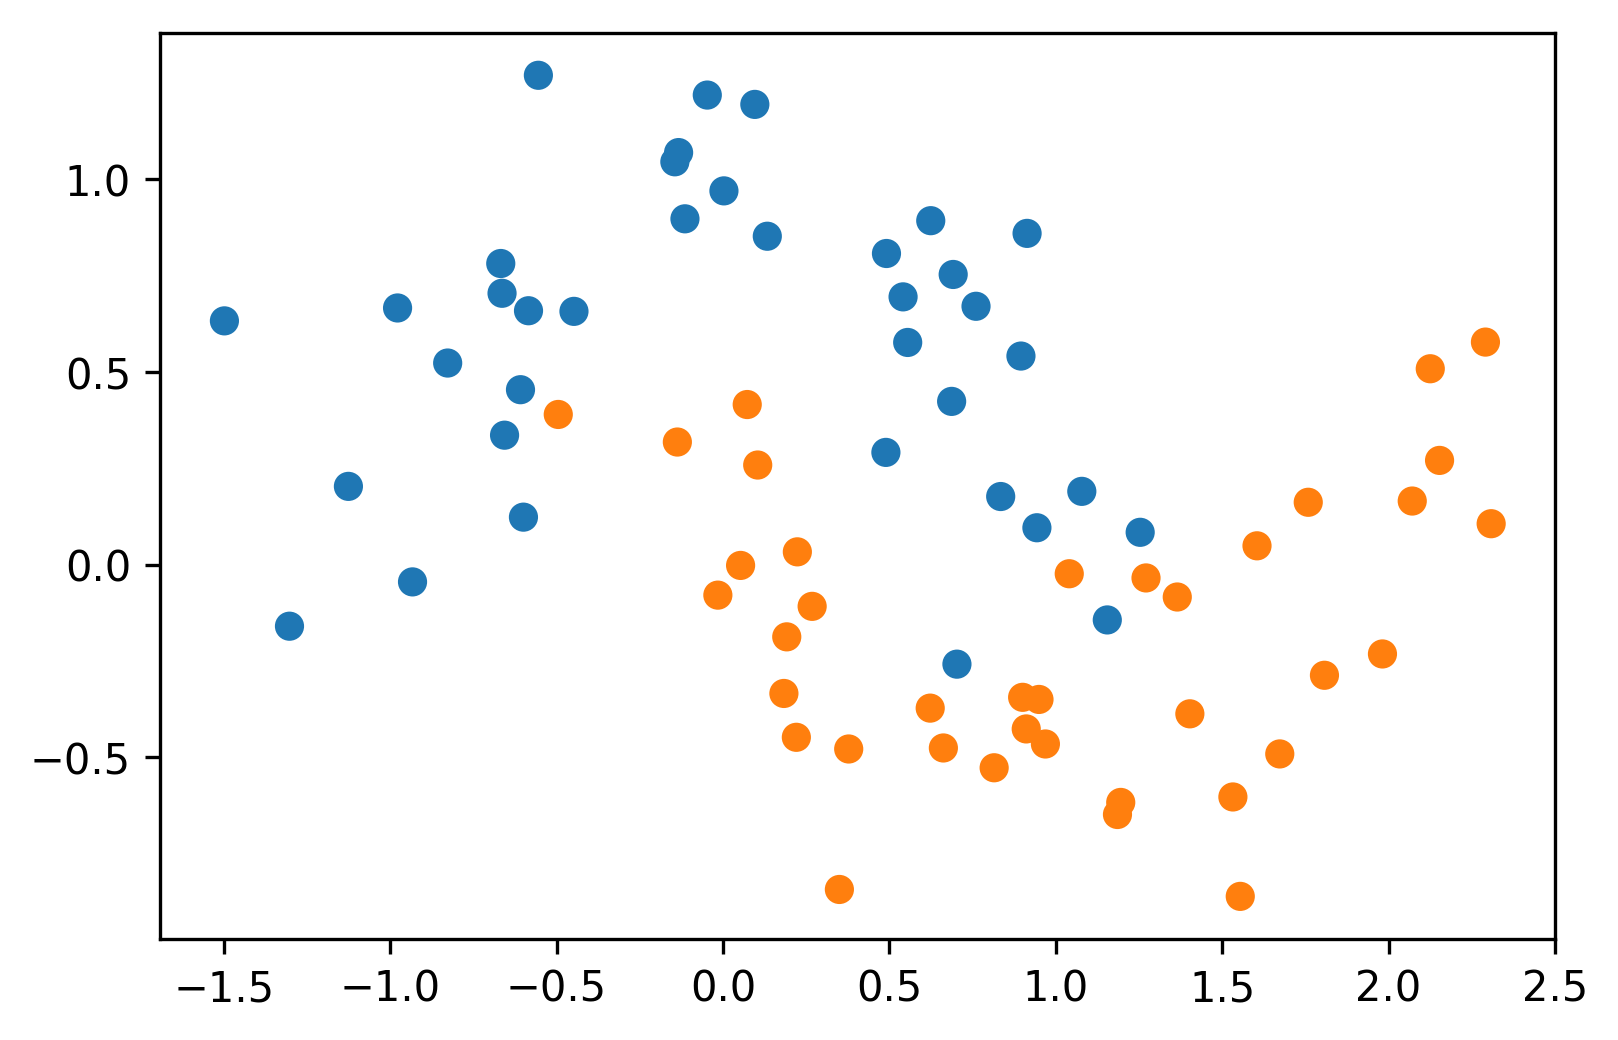

In [24]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

plt.scatter(X_train[:, 0], X_train[:, 1], c=plt.cm.Vega10(y_train))
xlim = plt.xlim()
ylim = plt.ylim()

In [25]:
xs = np.linspace(xlim[0], xlim[1], 1000)
ys = np.linspace(ylim[0], ylim[1], 1000)
xx, yy = np.meshgrid(xs, ys)
X_grid = np.c_[xx.ravel(), yy.ravel()]

In [26]:
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
print(mlp.score(X_train, y_train))
print(mlp.score(X_test, y_test))

1.0
0.88


(-0.97076417194933484, 1.3803169028667908)

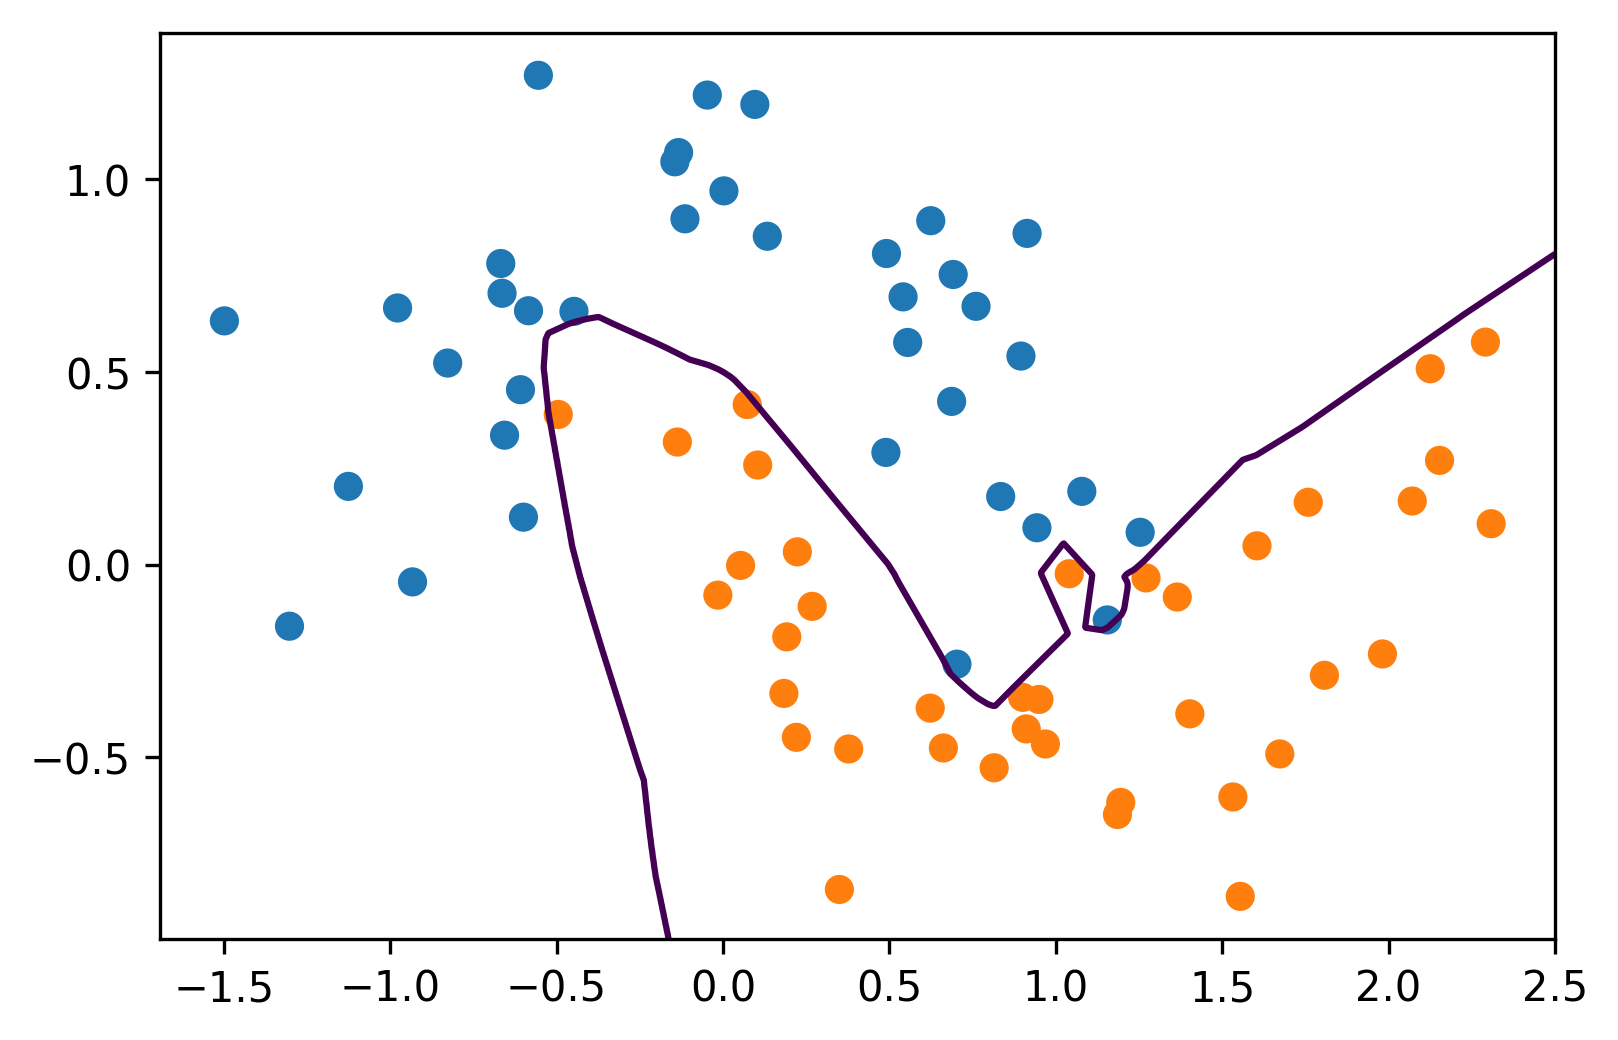

In [27]:
plt.contour(xx, yy, mlp.predict_proba(X_grid)[:, 1].reshape(xx.shape), levels=[.5])
plt.scatter(X_train[:, 0], X_train[:, 1], c=plt.cm.Vega10(y_train))

plt.xlim(xlim)
plt.ylim(ylim)

1.0
0.88
1.0
0.84
1.0
0.84
1.0
0.84
1.0
0.88
1.0
0.92
1.0
0.88
0.973333333333
0.92
1.0
0.88


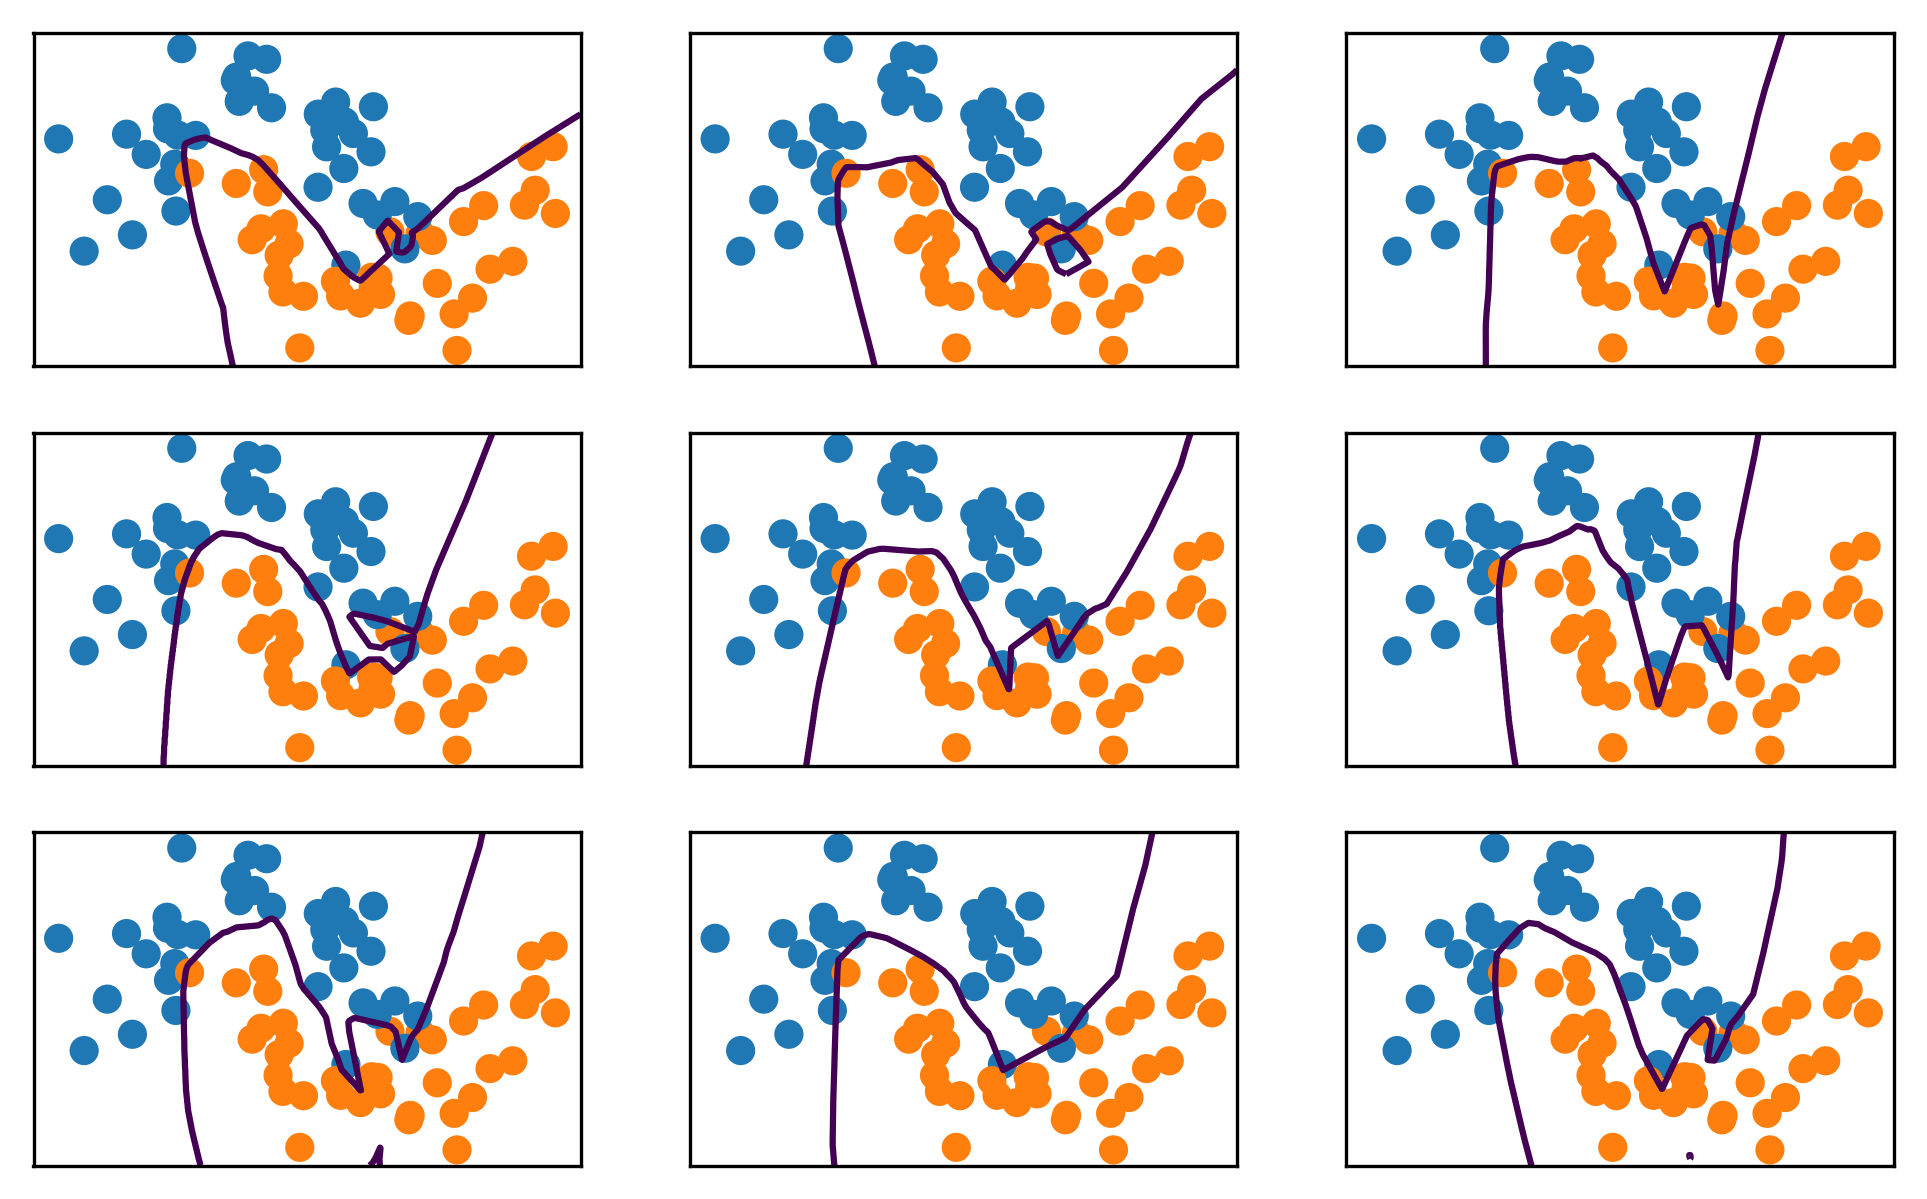

In [28]:
fig, axes = plt.subplots(3, 3, figsize=(8, 5))
for ax, i in zip(axes.ravel(), range(10)):
    mlp = MLPClassifier(solver='lbfgs', random_state=i).fit(X_train, y_train)
    print(mlp.score(X_train, y_train))
    print(mlp.score(X_test, y_test))

    ax.contour(xx, yy, mlp.predict_proba(X_grid)[:, 1].reshape(xx.shape), levels=[.5])
    ax.scatter(X_train[:, 0], X_train[:, 1], c=plt.cm.Vega10(y_train))

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_xticks(())
    ax.set_yticks(())